# Version 1 of Tables (Final Final Final Version) - 10/25/2020#

major updates include

* cleaned sample after cross-matching with JM's siena galaxy atlas
  - I matched the VF catalog to SGA using a match radius of 10 arcsec
  - 1902 sources did not match
    - sources are listed here https://docs.google.com/spreadsheets/d/1l9Ay1NSc7ovFglQCZ3PphaHmXep3LFMcdxCOwrXFHgQ/edit?usp=sharing
  - we reviewed each source by eye
  - then went back to by_eye classifications to update the codes on any galaxies that should be
    - deleted
    - recentered
    - merged with another galaxy (e.g. alfalfa source with offset coordinates)
    
  - need to trace back to galnumber in the by-eye spreadsheet
  
* addition of any sources in Steer catalog with vr < 500 but redshift independent distance > vr/H0
  - these will need to have NSA, HL and A100 matches as well :(
  - this will require some more thought...
  
  
* remove repeat NED names - this is just a problem with the NED names, not with the actual galaxies

In [81]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
%matplotlib inline


## 1.  Comparison with Siena Galaxy Atlas ##

**Description:**
we have finished reviewing all the galaxies that didn't match to JM's Siena Galaxy Atlas.  The list of matching galaxies is at:
https://docs.google.com/spreadsheets/d/1l9Ay1NSc7ovFglQCZ3PphaHmXep3LFMcdxCOwrXFHgQ/edit?usp=sharing

**Remedy:**
We will update the byeye classification spreadsheet.  The 
spreadsheet is at

https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing

Download as a xlsx file.  Will get saved in ~/Downloads/

**Action Items**
* need to carry original galnumber from the kitchen_sink through to the vf_clean catalog.
* added function add_byeye_galid in clean_kitchen_sink.py to add this column to the cleaned catalog
* rerun clean_kitchen_sink.py
  * creates vf_clean_sample.fits (9217 lines)
* rerun get_NEDname.py
  * creates vf_clean_sample_wNEDname.fits (9217 lines)
  * previous version had 9214 :(
* remove sources that have [KHL2017]S in name - updated byeye spreadsheet accordingly
* download updated bye eye spreadsheet and save in research/Virgo/google-tables
  * first download latest version of virgo_check_by_eye from google spreadsheet, save as excel file
  * move to ~/research/Virgo/google-tables
   ```
   mv ~/Downloads/virgo_check_sample_by_eye.xlsx virgo_check_sample_by_eye_v1.finished.xlsx
   ```
  * run this program 
   ```
   python ~/github/Virgo/programs/collate_check_by_eye_results.py
   ```
  * or from within ipython -pylab
```
%run ~/github/Virgo/programs/collate_check_by_eye_results.py
```
* download csv version of updated VF-notin-SGA 

```
mv ~/Downloads/VF-notin-SGA-10arcsecmatch-bestmatch-symmetric\ -\ VF-notin-SGA.csv VF-notin-SGA-10arcsecmatch-bestmatch-symmetric.csv

```
* rerun clean_kitchen_sink.py
  * will output v1 of files
    * output_catalog = 'vf_clean_sample_v1.fits'
    * output_clean = 'clean_sample_v1.fits' # I'm not sure why I have two output files, just a holdover I think
    * ipac_table = 'clean_sample_v1.txt'

**NOTES**
I updated the original classification spreadsheet based on our assessments of the galaxies that don't match JM's catalog.  I need to preserve the kitchen sink catalog b/c this is our last link to the original classification spreadsheet and cutouts.  I am uploading it to the visual classification folder.  This notebook describes how I related VFID in v0 catalogs to the line number in smart_kitchen_sink_v2.fits.  

We also noted galaxies that have a radius that was too big or too small.  I am going to incorporate this information into the write_subtables, where we merge different radial size estimates.  Added this to the function get_radius. 

We updated centers for some galaxies, but JM said not to both b/c his code will figure this out.
  
  
  


## 1a. Update byeye classifications ##

* get galnumber for VFID for galaxies in the https://docs.google.com/spreadsheets/d/1l9Ay1NSc7ovFglQCZ3PphaHmXep3LFMcdxCOwrXFHgQ/edit?usp=sharing
* update the by-eye classifications https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing
  * updating sheet on 2020-10-25
  
* having trouble reading the csv file into python - the headers are getting cutout.  This was b/c I had multiple columns with the same name.  Fixed this and now it loads fine.

  


## 1b. Make new version of cleaned kitchen sink

In [78]:
# got an error because indices in clean_new_a100 pointed to old indices
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

number of A100-only before cleaning =  44
number of duplicates =  1
AGC-only galaxies with duplicate entries
AGC 
----
5844
	double entry for AGC  5020
	double entry for AGC  5078
	double entry for AGC  5522
	double entry for AGC  5844
	double entry for AGC  5844
	double entry for AGC  5898
	double entry for AGC  6300
	double entry for AGC  7170
	double entry for AGC  7547
	double entry for AGC  9991
	double entry for AGC  202240
	double entry for AGC  211006
	double entry for AGC  213175
	double entry for AGC  213312
	double entry for AGC  214730
	double entry for AGC  220432
	double entry for AGC  220616
	double entry for AGC  220863
	double entry for AGC  220865
	double entry for AGC  222214
	double entry for AGC  222671
	double entry for AGC  224236
	double entry for AGC  226606
	double entry for AGC  229200
	double entry for AGC  232162
	double entry for AGC  233575
	double entry for AGC  238771
	double entry for AGC  240021
	double entry for AGC  241947
	double entry for AGC  722

IndexError: index 9206 is out of bounds for axis 0 with size 9043

### Updated code to review a100 galaxies #

* previously, I had run check_new_a100 to review the a100 galaxies that were added.  
* the function clean_new_a100 got rid of the duplicates, or merged them with the correct parent

```
        child = np.array([7423, 9207, 9209, 8952],'i')
        parent = np.array([9206, 6575, 6638, 9213],'i')
        for i in range(len(child)):
            print('merging {} with {}'.format(child[i],parent[i]))
            self.merge_sources(parent[i],child[i],cat=self.clean_a100,HL=False,NSA=False,AGC=False,A100=True)
            self.clean_a100['A100flag'][parent[i]] = True
```

* the updated catalog has different order, so now I have to redo the a100 match

* moving forward, I should match by some name rather than array index, in case we update the catalog again.


number of A100-only before cleaning =  44
number of duplicates =  1
AGC-only galaxies with duplicate entries
AGC 
----
5844
	double entry for AGC  5020
	double entry for AGC  5078
	double entry for AGC  5522
	double entry for AGC  5844
	double entry for AGC  5844
	double entry for AGC  5898
	double entry for AGC  6300
	double entry for AGC  7170
	double entry for AGC  7547
	double entry for AGC  9991
	double entry for AGC  202240
	double entry for AGC  211006
	double entry for AGC  213175
	double entry for AGC  213312
	double entry for AGC  214730
	double entry for AGC  220432
	double entry for AGC  220616
	double entry for AGC  220863
	double entry for AGC  220865
	double entry for AGC  222214
	double entry for AGC  222671
	double entry for AGC  224236
	double entry for AGC  226606
	double entry for AGC  229200
	double entry for AGC  232162
	double entry for AGC  233575
	double entry for AGC  238771
	double entry for AGC  240021
	double entry for AGC  241947
	double entry for AGC  722

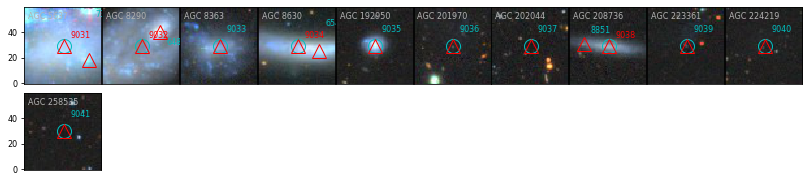

In [84]:
# running with check_new_a100
# and the rest of runall commented out
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py
plt.show()

number of A100-only before cleaning =  44
number of duplicates =  1
AGC-only galaxies with duplicate entries
AGC 
----
5844
	double entry for AGC  5020
	double entry for AGC  5078
	double entry for AGC  5522
	double entry for AGC  5844
	double entry for AGC  5844
	double entry for AGC  5898
	double entry for AGC  6300
	double entry for AGC  7170
	double entry for AGC  7547
	double entry for AGC  9991
	double entry for AGC  202240
	double entry for AGC  211006
	double entry for AGC  213175
	double entry for AGC  213312
	double entry for AGC  214730
	double entry for AGC  220432
	double entry for AGC  220616
	double entry for AGC  220863
	double entry for AGC  220865
	double entry for AGC  222214
	double entry for AGC  222671
	double entry for AGC  224236
	double entry for AGC  226606
	double entry for AGC  229200
	double entry for AGC  232162
	double entry for AGC  233575
	double entry for AGC  238771
	double entry for AGC  240021
	double entry for AGC  241947
	double entry for AGC  722

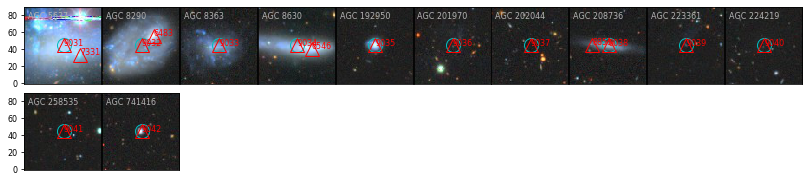

In [97]:
# running with check_new_a100
# with image size = 90 arcsec
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py
plt.show()

### After updating indices of AGC-only sources that need to be merged

* you get the indices from the cutout images (and the printout of which images are in FOV, if text overlaps or is hard to read)
* uncomment the rest of runall, and comment out check_new_a100
* Then run again

In [100]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py


number of A100-only before cleaning =  44
number of duplicates =  1
AGC-only galaxies with duplicate entries
AGC 
----
5844
	double entry for AGC  5020
	double entry for AGC  5078
	double entry for AGC  5522
	double entry for AGC  5844
	double entry for AGC  5844
	double entry for AGC  5898
	double entry for AGC  6300
	double entry for AGC  7170
	double entry for AGC  7547
	double entry for AGC  9991
	double entry for AGC  202240
	double entry for AGC  211006
	double entry for AGC  213175
	double entry for AGC  213312
	double entry for AGC  214730
	double entry for AGC  220432
	double entry for AGC  220616
	double entry for AGC  220863
	double entry for AGC  220865
	double entry for AGC  222214
	double entry for AGC  222671
	double entry for AGC  224236
	double entry for AGC  226606
	double entry for AGC  229200
	double entry for AGC  232162
	double entry for AGC  233575
	double entry for AGC  238771
	double entry for AGC  240021
	double entry for AGC  241947
	double entry for AGC  722

## 1c. Make new version of sub-tables ##
* match to unwise?
* run write_subtables.py
  * run once.  this will generate coords_for_z0MGS.txt
  * match to z0MGS using irsa


In [ ]:
# match to unwise

In [ ]:
# write sub tables

# commenting out get_unwise, because I'll have to match to new table
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/write_subtables.py --north

## 2.  BV has found ##

* galaxies in Steer with vr< 500 but redshift-independent distances that are consistent with our cut
* a few from EVCC that are not included



# Add NED name #

In [11]:

!ls ~/research/Virgo/tables-north/v1

byeyeid.txt  vfid-2delete.txt  vfid-2delete.txt~


## 3. Galaxies that point to the same NED name ##

# 1b - more Details on how I updated the byeye spreadsheet

Basically, this involved linking the VFID with the galaxy number in the original spreadsheet

* the number in the original spreadsheet is the line number in smart_kitchen_sink.v2.fits
* however, when I reran clean_kitchen_sink in Oct 2020, I ended up with 3 extra galaxies (no idea why), and so the VFIDs were different.
* figured things out eventually - searched for objects by name.

## This is what worked in Oct 2020

In [67]:
badgals = Table.read('/home/rfinn/research/Virgo/google-tables/VF-notin-SGA-10arcsecmatch-bestmatch-symmetric.csv',format='ascii')

In [68]:
# keep galaxies that we need to get rid of 
badflag = badgals['keep?'] == 0
badgals = badgals[badflag]

In [69]:
len(badgals)

184

In [70]:
sink = Table.read('/home/rfinn/research/Virgo/supersample/smart_kitchen_sink_v2.fits')

In [77]:
sinkindex = np.arange(len(sink))
match_field = ['objname','NSAID','NSAIDV0']
sink_field = ['objname','NSAID','NSAID_2']
outfile = open('/home/rfinn/research/Virgo/google-tables/byeye-crossmatch-ids.csv','w')
for i in range(len(badgals)):
    matchflag=False
    for j in range(len(match_field)):
        gname = badgals[match_field[j]][i]
        if (gname != 'N/A'):# & (gname != 0):
            gflag = sink[sink_field[j]] == gname
            if sum(gflag) == 1:
                #print(badgals['VFID'][i],sinkindex[gflag][0])
                s = '%s, %i \n'%(badgals['VFID'][i],sinkindex[gflag][0])
                outfile.write(s)
                matchflag=True
                break
            elif sum(gflag) == 2:
                print(badgals['VFID'][i],sinkindex[gflag])
                s = '%s, %i, %i \n'%(badgals['VFID'][i],sinkindex[gflag][0],sinkindex[gflag][0])
                outfile.write(s)
                matchflag=True
            elif sum(gflag) > 1:
                pass
        
    if not(matchflag):
        #print('HELP!!! no match for',badgals['VFID'][i],gname)
        print(badgals['VFID'][i],-999)
        outfile.write('%s, %i \n'%(badgals['VFID'][i],-999))
outfile.close()

VFID3547 -999
VFID4002 -999
VFID6502 -999


# Old stuff - keeping in case it's useful

In [2]:
d = fits.getdata('/home/rfinn/research/Virgo/supersample/vf_clean_sample.fits')

In [4]:
vfdict = dict((a,b) for a,b in zip(d['VFID'],d['galnumber']))

In [ ]:
dd = Table.read('/home/rfinn/research/Virgo/tables-north/v1/vfid-2delete.txt',format='ascii',data_start=0)

In [39]:
# old stuff that might be useful, but didn't work for making version 1
outfile = open('/home/rfinn/research/Virgo/tables-north/v1/byeyeid-2delete.txt','w')
for d in dd:
    print(d[0],vfdict[d[0]])
    s = str(str(vfdict[d[0]])+'\n')
    outfile.write(s)
outfile.close()

VFID0091 1505
VFID0288 9578
VFID0379 9241
VFID0385 3200
VFID0396 1121
VFID0544 7600
VFID0657 1470
VFID0769 8764
VFID0843 1180
VFID0985 4481
VFID0986 7473
VFID1029 7605
VFID1140 1556
VFID1144 8357
VFID1203 3721
VFID1233 728
VFID1271 2770
VFID1300 3635
VFID1306 8988
VFID1541 8311
VFID1550 8806
VFID1553 759
VFID1613 8930
VFID1715 3507
VFID1743 8335
VFID1808 2760
VFID1815 8368
VFID1868 388
VFID1886 7479
VFID1888 3466
VFID1912 7697
VFID1985 762
VFID2070 7120
VFID2112 9246
VFID2304 8513
VFID2360 6903
VFID2376 4919
VFID2540 2287
VFID2543 2626
VFID2661 3340
VFID2700 2892
VFID2716 2493
VFID2738 4047
VFID2799 6511
VFID2810 1085
VFID2847 5530
VFID2885 3742
VFID2895 6086
VFID2929 4544
VFID2958 6381
VFID2991 343
VFID3001 6648
VFID3010 9420
VFID3012 7334
VFID3014 5326
VFID3032 6524
VFID3050 1166
VFID3055 7821
VFID3078 1267
VFID3087 5357
VFID3115 7981
VFID3168 6650
VFID3187 2115
VFID3211 5918
VFID3277 7449
VFID3290 5696
VFID3314 5331
VFID3393 6098
VFID3400 965
VFID3420 6601
VFID3431 6822
VFID3448 732